In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Import Encoder
from sklearn.preprocessing import  LabelEncoder
# Import Models
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Import Evaluation Matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

C:\Users\omark\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ds = pd.read_csv('AssignmentPart1.csv')

In [3]:
ds

,Unnamed: 0,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0,100,100,100,100,100,100,100,100,100,...,100,-7316.963900,4.864795e+06,3,2,136,2,11,13,1371717429
1,1,100,100,100,100,100,100,100,-79,100,...,100,-7523.494500,4.864952e+06,1,1,104,2,14,7,1371720695
2,2,100,100,100,100,100,100,100,100,100,...,100,-7318.341100,4.864815e+06,4,2,139,2,6,19,1371720712
3,3,100,100,100,100,100,100,100,100,100,...,100,-7390.184700,4.864839e+06,1,2,143,2,7,6,1371721370
4,4,100,100,100,100,100,100,100,100,100,...,100,-7374.347500,4.864846e+06,4,2,124,2,13,17,1371722006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13951,13951,100,100,100,100,100,100,100,100,100,...,100,-7352.664769,4.864829e+06,0,2,124,1,17,22,1371721606
13952,13952,100,100,100,100,100,100,100,100,100,...,100,-7318.341100,4.864815e+06,1,2,130,2,12,24,1371716449
13953,13953,100,100,100,100,100,100,100,100,100,...,100,-7336.299000,4.864829e+06,1,2,111,2,16,14,1371720695
13954,13954,100,100,100,100,100,100,-85,100,100,...,100,-7646.206400,4.864932e+06,1,0,234,2,11,13,1369928119


In [4]:
ds_main = ds.head(1000)

<AxesSubplot:>

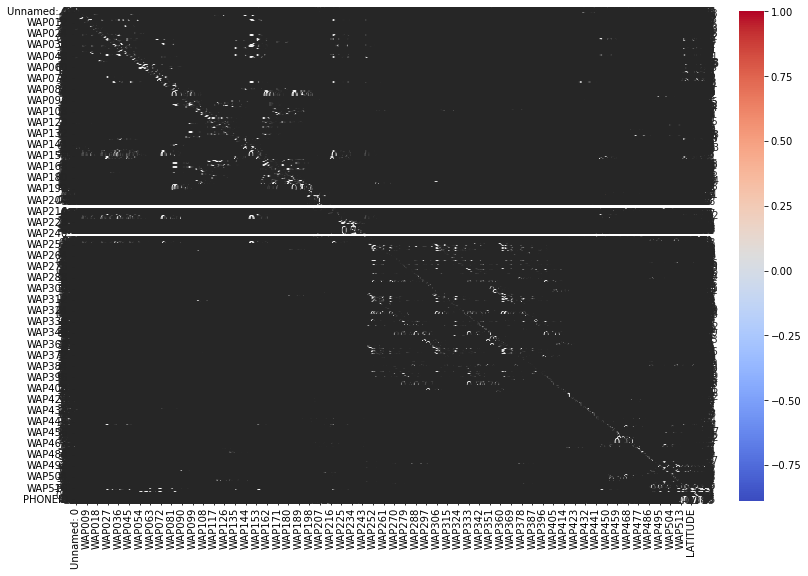

In [5]:
corr = ds_main.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [6]:
WAPzero =[]



In [8]:
ds.columns

Index(['Unnamed: 0', 'WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005',
       'WAP006', 'WAP007', 'WAP008', 'WAP009',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=530)

In [9]:
ds

,Unnamed: 0,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0,100,100,100,100,100,100,100,100,100,...,100,-7316.963900,4.864795e+06,3,2,136,2,11,13,1371717429
1,1,100,100,100,100,100,100,100,-79,100,...,100,-7523.494500,4.864952e+06,1,1,104,2,14,7,1371720695
2,2,100,100,100,100,100,100,100,100,100,...,100,-7318.341100,4.864815e+06,4,2,139,2,6,19,1371720712
3,3,100,100,100,100,100,100,100,100,100,...,100,-7390.184700,4.864839e+06,1,2,143,2,7,6,1371721370
4,4,100,100,100,100,100,100,100,100,100,...,100,-7374.347500,4.864846e+06,4,2,124,2,13,17,1371722006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13951,13951,100,100,100,100,100,100,100,100,100,...,100,-7352.664769,4.864829e+06,0,2,124,1,17,22,1371721606
13952,13952,100,100,100,100,100,100,100,100,100,...,100,-7318.341100,4.864815e+06,1,2,130,2,12,24,1371716449
13953,13953,100,100,100,100,100,100,100,100,100,...,100,-7336.299000,4.864829e+06,1,2,111,2,16,14,1371720695
13954,13954,100,100,100,100,100,100,-85,100,100,...,100,-7646.206400,4.864932e+06,1,0,234,2,11,13,1369928119


In [10]:
#Looking for columns that has 0 values and appending to list to handle with NaN values... using try catch continue method
for i in ds.iloc[:,1:521]:
    try:
        if ds[i].value_counts()[0]>0:
            WAPzero.append(i)
            
    except:
        continue

In [11]:
WAPzero

['WAP012',
 'WAP064',
 'WAP074',
 'WAP082',
 'WAP083',
 'WAP085',
 'WAP087',
 'WAP117',
 'WAP118',
 'WAP128',
 'WAP144',
 'WAP145',
 'WAP189',
 'WAP279',
 'WAP369',
 'WAP391',
 'WAP398',
 'WAP481',
 'WAP484',
 'WAP486',
 'WAP496',
 'WAP516',
 'WAP517']

In [12]:
for i in WAPzero:
    ds[i]=ds[i].replace(0,np.nan)
ds.isna().sum().sum()
ds=ds.dropna()

In [13]:
ds.shape

(13869, 530)

In [14]:
WAP100=[]

In [15]:
#Taking note of the columns that has all 100 values to remove them later on since they're not needed
for i in ds.iloc[:,0:520]:
    try:
        if ds[i].value_counts()[100]==len(ds):
            WAP100.append(i)
    except:
        continue

In [16]:
WAP100

['WAP003',
 'WAP004',
 'WAP079',
 'WAP092',
 'WAP093',
 'WAP094',
 'WAP095',
 'WAP152',
 'WAP158',
 'WAP159',
 'WAP160',
 'WAP200',
 'WAP215',
 'WAP217',
 'WAP226',
 'WAP227',
 'WAP238',
 'WAP239',
 'WAP240',
 'WAP241',
 'WAP242',
 'WAP243',
 'WAP244',
 'WAP245',
 'WAP246',
 'WAP247',
 'WAP254',
 'WAP293',
 'WAP296',
 'WAP301',
 'WAP303',
 'WAP304',
 'WAP307',
 'WAP333',
 'WAP349',
 'WAP353',
 'WAP360',
 'WAP365',
 'WAP416',
 'WAP419',
 'WAP423',
 'WAP429',
 'WAP433',
 'WAP438',
 'WAP441',
 'WAP442',
 'WAP444',
 'WAP445',
 'WAP451',
 'WAP458',
 'WAP464',
 'WAP482',
 'WAP485',
 'WAP487',
 'WAP488',
 'WAP491',
 'WAP497']

In [17]:
ds=ds.drop(columns=WAP100)

In [18]:
ds.shape

(13869, 473)

In [20]:
ds['BUILDINGID'].nunique()


3

In [21]:
ds['FLOOR'].nunique()


5

In [22]:
ds['USERID'].nunique()


18

In [23]:
ds['RELATIVEPOSITION'].nunique()


2

In [24]:
ds.drop(columns=["Unnamed: 0",'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],axis=1,inplace=True)

In [25]:
ds

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID
0,100,100,100,100,100,100,100,100,100,100.0,...,100.0,100.0,100,100,100,-7316.963900,4.864795e+06,3,2,136
1,100,100,100,100,100,-79,100,100,100,100.0,...,100.0,100.0,100,100,100,-7523.494500,4.864952e+06,1,1,104
2,100,100,100,100,100,100,100,100,-87,-88.0,...,100.0,100.0,100,100,100,-7318.341100,4.864815e+06,4,2,139
3,100,100,100,100,100,100,100,100,100,100.0,...,100.0,100.0,100,100,100,-7390.184700,4.864839e+06,1,2,143
4,100,100,100,100,100,100,100,100,-73,-73.0,...,100.0,-74.0,100,100,100,-7374.347500,4.864846e+06,4,2,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13951,100,100,100,100,100,100,100,100,100,100.0,...,-81.0,100.0,100,100,100,-7352.664769,4.864829e+06,0,2,124
13952,100,100,100,100,100,100,100,100,100,100.0,...,-46.0,-74.0,100,100,100,-7318.341100,4.864815e+06,1,2,130
13953,100,100,100,100,100,100,100,100,100,100.0,...,-72.0,-65.0,100,100,100,-7336.299000,4.864829e+06,1,2,111
13954,100,100,100,100,-85,100,100,100,100,100.0,...,100.0,100.0,100,100,100,-7646.206400,4.864932e+06,1,0,234


# VISUALIZATION

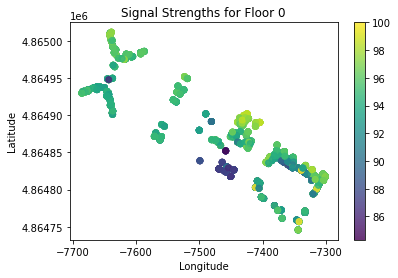

In [26]:
ss_cols = [col for col in ds.columns if col.startswith('WAP')]

# Create a scatter plot of the signal strengths for a specific floor
floor_num = 0
plt.scatter(ds[ds['FLOOR']==floor_num]['LONGITUDE'],
            ds[ds['FLOOR']==floor_num]['LATITUDE'],
            c=ds[ds['FLOOR']==floor_num][ss_cols].mean(axis=1),
            cmap='viridis',
            alpha=0.8)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Signal Strengths for Floor {floor_num}')
plt.show()

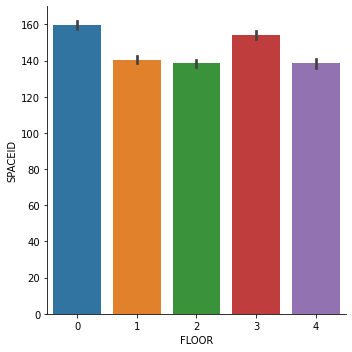

In [27]:
sns.catplot(data = ds, x= "FLOOR", y= "SPACEID", kind = "bar")

C:\Users\omark\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLOOR', ylabel='count'>

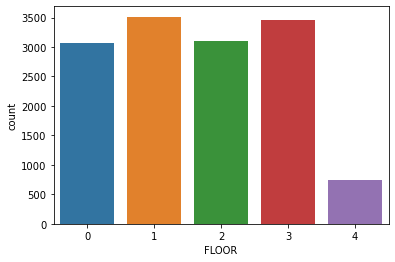

In [28]:
sns.countplot(ds['FLOOR'])

In [29]:
print("no of floors in each building: ")
print(ds.groupby('BUILDINGID')['FLOOR'].unique())

no of floors in each building: 
BUILDINGID
0       [2, 1, 3, 0]
1       [1, 2, 3, 0]
2    [3, 4, 1, 2, 0]
Name: FLOOR, dtype: object


This tells us building 2 is the largest with the most floors.this can be helpful for traffic monitoring (in my understanding)

# TENSOR FLOW

In [30]:
all_100_cols = ds.columns[ds.eq(100).all()] 

ds.drop(columns=all_100_cols, inplace=True)

In [31]:
ds.shape

(13869, 467)

In [32]:

from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import losses
import itertools

In [33]:
def normalize(x, xmin, xmax, a, b):
    numerator = x - xmin
    denominator = xmax - xmin
    multiplier = b - a
    ans = (numerator/denominator)*multiplier + a
    return ans
lat_min = 4864745.7450159714
lat_max = 4865017.3646842018
tmin = 0
tmax = 1
def normalize_lat(num):
    num = float(num)
    ans = normalize(num, lat_min, lat_max, tmin, tmax)
    return ans
long_min = -7695.9387549299299000
long_max = -7299.786516730871000
tmin = 0
tmax = 1
def normalize_long(num):
    num = float(num)
    ans = normalize(num, long_min, long_max, tmin, tmax)
    return ans
# Normalize latitudes and longitudes
ds["LATITUDE"] = ds["LATITUDE"].apply(normalize_lat)
ds["LONGITUDE"] = ds["LONGITUDE"].apply(normalize_long)

In [35]:
# X=ds.drop(columns=["Unnamed: 0",'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID','RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP','SPACEID'])
# y=ds["SPACEID"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [43]:
X=ds.loc[:,"WAP001":"WAP519"]
Y=ds[['LONGITUDE', 'LATITUDE']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)


In [44]:
def r2(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())
    return r2



# Create the TensorFlow model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(len(X.columns),)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=[r2, "mae"])

# Train the model
model.fit(X_train, Y_train, epochs=28, batch_size=16)

# Evaluate the model on the test set
mse = model.evaluate(X_test, Y_test)

print('Mean squared error:', mse)

Epoch 1/28
607/607 [==============================] - 1s 932us/step - loss: 57.7346 - r2: -752.1290 - mae: 3.8098
Epoch 2/28
607/607 [==============================] - 1s 867us/step - loss: 1.3956 - r2: -16.5657 - mae: 0.8603
Epoch 3/28
607/607 [==============================] - 1s 856us/step - loss: 0.2223 - r2: -1.7885 - mae: 0.3253
Epoch 4/28
607/607 [==============================] - 1s 915us/step - loss: 0.0654 - r2: 0.1881 - mae: 0.1896
Epoch 5/28
607/607 [==============================] - 1s 851us/step - loss: 0.0497 - r2: 0.3799 - mae: 0.1720
Epoch 6/28
607/607 [==============================] - 1s 846us/step - loss: 0.0442 - r2: 0.4461 - mae: 0.1656
Epoch 7/28
607/607 [==============================] - 1s 856us/step - loss: 0.0433 - r2: 0.4578 - mae: 0.1649
Epoch 8/28
607/607 [==============================] - 1s 869us/step - loss: 0.0454 - r2: 0.4377 - mae: 0.1687
Epoch 9/28
607/607 [==============================] - 1s 876us/step - loss: 0.0431 - r2: 0.4607 - mae: 0.1641
Epo

In [52]:
X=ds.drop(columns=['LONGITUDE', 'LATITUDE', 'SPACEID'])
y=ds["SPACEID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
print("Training Performance: ")
print(rfc.score(X_train,y_train))
print("Testing Performance: ")
print(rfc.score(X_test,y_test))

Training Performance: 
0.9683765966213432
Testing Performance: 
0.7673636145157414


In [57]:
X=ds.drop(columns=['LONGITUDE', 'LATITUDE', 'SPACEID'])
y=ds["SPACEID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [58]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [59]:
print("Training Performance: ")
print(knn.score(X_train,y_train))
print("Testing Performance: ")
print(knn.score(X_test,y_test))

Training Performance: 
0.7403172641120725
Testing Performance: 
0.5726988704638308


In [60]:
X=ds.drop(columns=['LONGITUDE', 'LATITUDE', 'SPACEID'])
y=ds["SPACEID"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [61]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [63]:
print("Training Performance: ")
print(svm.score(X_train,y_train))
print("Testing Performance: ")
print(svm.score(X_test,y_test))

Training Performance: 
0.7367119901112484
Testing Performance: 
0.547945205479452


# CONCLUSION

Random Forest had the highest score because It can work well for indoor location prediction because it can capture complex nonlinear relationships between the input features and the target variables. Another reason can be because it is not prone to overfitting.